In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [8]:
df = pd.read_csv('random_timetable2.csv', sep=';', encoding='cp1251')
df.head()

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
0,101,пн,1,Мат Анализ,Иванов,Лекция,Васильевский остров,211
1,101,пн,2,Английский,Шептунов,Практика,Васильевский остров,213
2,101,пн,3,ОП,Рахимов,Лекция,Васильевский остров,203
3,101,вт,1,Алгебра,Заболотный,Лекция,Петергоф,204
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф,207


# Занятость конкретной аудитории в определенный промежуток времени


In [9]:
number = int(input())
startDay = input()
startTime = int(input())
stopDay = input()
stopTime = int(input())

207
вт
1
пт
2


In [80]:
days = np.array(['пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
for i, day in enumerate(days):
    if day == startDay:
        break
time = startTime
result = np.array([])
timeList = np.array([])
            
# Таблица данных для одной аудитории
x = df[df['Аудитория'] == number]

while (day != stopDay) or (time != stopTime):
    for index, row in x.iterrows():
        if row['День'] == day and row['Номер пары'] == time:
            para = True
    if para == True:
        result = np.append(result, 'Занято')
    else: 
        result = np.append(result, 'Свободно')
    timeList = np.append(timeList, day + ' ' + str(time))
    if time != 4:
        time += 1
    else:
        time = 1
        i += 1
        day = days[i]
    para = False

In [81]:
# Все занятия, проходящие в данной аудитории
x.head(20)

,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
4,101,вт,2,Мат Анализ,Иванов,Лекция,Петергоф,207
20,102,вт,1,Дискр Мат-ка,Исаев,Лекция,Васильевский остров,207
38,103,пн,3,Английский,Шептунов,Практика,Петергоф,207
54,104,пн,1,Дискр Мат-ка,Исаев,Практика,Петергоф,207
70,104,сб,1,Мат Анализ,Купетов,Практика,Петергоф,207
88,105,сб,1,Мат Анализ,Купетов,Практика,Петергоф,207
99,106,чт,1,История,Петров,Лекция,Петергоф,207
106,106,сб,1,Мат Анализ,Купетов,Практика,Петергоф,207
123,107,пт,2,Дискр Мат-ка,Исаев,Практика,Петергоф,207
138,108,чт,4,Английский,Васильева,Практика,Петергоф,207


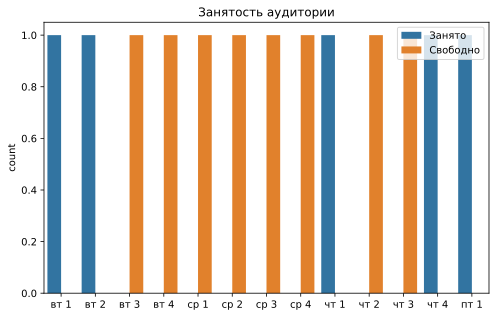

In [83]:
sns.countplot(x = timeList, hue = result);
plt.title('Занятость аудитории');

# Список свободных аудиторий в определенный промежуток времени на факультете

In [91]:
startDay = input()
startTime = int(input())
stopDay = input()
stopTime = int(input())

cб
1
сб
4


In [96]:
days = np.array(['пн', 'вт', 'ср', 'чт', 'пт', 'сб'])
for i, day in enumerate(days):
    if day == startDay:
        break
time = startTime

classroomList = pd.unique(df['Аудитория'])
result = np.zeros(len(classroomList))


while (day != stopDay) or (time != stopTime):
    for index, row in df.iterrows():
        if row['День'] == day and row['Номер пары'] == time:
            for j, room in enumerate(classroomList):
                if row['Аудитория'] == room:
                    result[j] += 1
    if time != 4:
        time += 1
    else:
        time = 1
        i += 1
        day = days[i]

print('Свободные аудитории с ', startTime, ' пары ', startDay, ' до ', stopTime, '(не включительно) пары ', stopDay)
for i, room in enumerate(classroomList):
    if result[i] == 0:
        print(room)

Свободные аудитории с  1  пары  cб  до  4 (не включительно) пары  сб
211
213
204
208
214
210


# Расписание конкретной аудитории

In [104]:
number = int(input())

214


In [119]:
x = df[df['Аудитория'] == number]
x = x.sort_values(by=['День', 'Номер пары'], ascending=[True, True])
x = pd.concat([x[x['День'] == 'пн'], x[x['День'] == 'вт'], x[x['День'] == 'ср'], x[x['День'] == 'чт'], x[x['День'] == 'пт'], x[x['День'] == 'сб']], ignore_index=True)
x.head(20)


,Номер группы,День,Номер пары,Предмет,Преподаватель,Вид занятия,Адрес,Аудитория
0,102,пн,2,Алгебра,Заболотный,Лекция,Петергоф,214
1,105,вт,3,Английский,Мракова,Практика,Петергоф,214
2,103,вт,4,Английский,Шептунов,Практика,Петергоф,214
3,108,ср,2,Алгебра,Заболотный,Лекция,Петергоф,214
4,109,ср,3,История,Петров,Лекция,Петергоф,214
5,107,ср,4,ПЭВМ,Егоров,Практика,Петергоф,214
6,103,чт,1,История,Петров,Лекция,Петергоф,214
7,108,чт,1,ОП,Авдеев,Лекция,Петергоф,214
8,101,чт,2,ОП,Рахимов,Практика,Петергоф,214
9,106,чт,4,ПЭВМ,Сорокин,Практика,Петергоф,214
